# Chicago crime

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present. Source – [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Dashboard/5cd6-ry5g)

On this dataset we'll showcase some Pandas features, but for a more complete reference, please keep the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) bookmarked.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

## Read the data

The dataset is pretty large…

In [2]:
ls -hl data/chicago_crime/

total 1.7G
-rw-r--r-- 1 jovyan users 1.5G Apr 16 18:55 Crimes_-_2001_to_present.csv
-rw-r--r-- 1 jovyan users 225M Apr 23 07:52 Crimes_-_2001_to_present-medium.csv
-rw-r--r-- 1 jovyan users 2.3K Apr 23 07:52 Crimes_-_2001_to_present-small.csv


Let's see what the CSV file looks like…

In [3]:
# Python variables work with bash commands \o/
file_path = 'data/chicago_crime/Crimes_-_2001_to_present.csv'

# first line
!head $file_path -n 1

!echo

# second line
!head $file_path -n 2 | tail -n 1

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location

10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,1111,011,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)"


As the file size is pretty big, let's first create a subset to iterate more quickly.

In [4]:
file_path_small = 'data/chicago_crime/Crimes_-_2001_to_present-small.csv'

!head $file_path > $file_path_small

Use the allmighty `pd.read_csv` function

In [5]:
crimes_small = pd.read_csv(file_path_small, parse_dates=[2], index_col=[2])
crimes_small

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"
2015-03-18 22:00:00,10000098,HY190032,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,False,False,223,...,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443,-87.604284,"(41.805443345, -87.604283976)"
2015-03-18 23:00:00,10000099,HY190047,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,733,...,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766403,-87.649296,"(41.766402779, -87.649296123)"
2015-03-18 21:35:00,10000100,HY189988,042XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,213,...,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817553,-87.619819,"(41.817552577, -87.619818523)"
2015-03-18 22:09:00,10000101,HY190020,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,912,...,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138,-87.672782,"(41.828138428, -87.672782106)"


Excellent! Now let's run this on the big file…

In [6]:
file_path_medium = 'data/chicago_crime/Crimes_-_2001_to_present-medium.csv'

!head $file_path -n 1000001 > $file_path_medium

crimes = pd.read_csv(file_path_medium, parse_dates=[2], index_col=[2])
crimes.tail()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2004-05-05 21:00:00,3310033,HK345878,038XX W ARGYLE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1712,...,39.0,14.0,14,1150069.0,1932953.0,2004,02/10/2018 03:50:01 PM,41.971935,-87.723554,"(41.971934656, -87.723553785)"
2004-04-30 08:10:00,3310034,HK333841,003XX E 43RD ST,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,222,...,3.0,38.0,03,1178941.0,1876568.0,2004,02/10/2018 03:50:01 PM,41.816599,-87.619114,"(41.816598679, -87.619113763)"
2004-05-06 04:53:00,3310037,HK345694,026XX N HOYNE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,1913,...,1.0,7.0,14,1162363.0,1917641.0,2004,02/10/2018 03:50:01 PM,41.929669,-87.678777,"(41.929668705, -87.678776837)"
2004-05-05 16:20:00,3310040,HK344741,049XX S HERMITAGE AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,931,...,16.0,61.0,08B,1165514.0,1871908.0,2004,02/10/2018 03:50:01 PM,41.804107,-87.668499,"(41.804106795, -87.668499335)"
2004-05-05 22:00:00,3310059,HK345897,071XX S HALSTED ST,0810,THEFT,OVER $500,ALLEY,False,False,732,...,6.0,68.0,06,1172199.0,1857618.0,2004,02/10/2018 03:50:01 PM,41.764749,-87.644402,"(41.764748911, -87.644401916)"


In [7]:
crimes.index

DatetimeIndex(['2015-03-18 19:44:00', '2015-03-18 23:00:00',
               '2015-03-18 22:45:00', '2015-03-18 22:30:00',
               '2015-03-18 21:00:00', '2015-03-18 22:00:00',
               '2015-03-18 23:00:00', '2015-03-18 21:35:00',
               '2015-03-18 22:09:00', '2015-03-18 21:25:00',
               ...
               '2004-05-05 17:00:00', '2004-05-05 18:00:00',
               '2004-05-05 19:26:41', '2004-05-04 22:43:27',
               '2004-05-05 23:55:00', '2004-05-05 21:00:00',
               '2004-04-30 08:10:00', '2004-05-06 04:53:00',
               '2004-05-05 16:20:00', '2004-05-05 22:00:00'],
              dtype='datetime64[ns]', name='Date', length=1000000, freq=None)

In [8]:
print(f'{crimes.memory_usage().sum() / 1024**2} MB')

154.4952392578125 MB


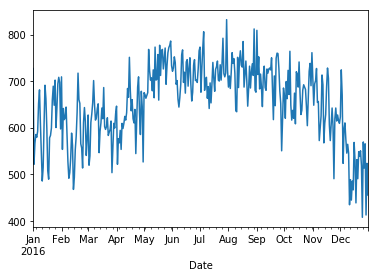

In [9]:
daily_crimes = crimes['Primary Type'].resample('D').count()
daily_crimes.sort_index(inplace=True)
daily_crimes2016 = daily_crimes['2016']
daily_crimes2016.plot()

## Pandas data structures

Let's explain them on the data we have…

### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

So, `crime_types` is a series of strings designating types of crimes and labeled with the crime's time of occurrence.

In [10]:
crime_types = crimes['Primary Type']
crime_types

Date
2015-03-18 19:44:00                       BATTERY
2015-03-18 23:00:00                 OTHER OFFENSE
2015-03-18 22:45:00                       BATTERY
2015-03-18 22:30:00                       BATTERY
2015-03-18 21:00:00                       ROBBERY
2015-03-18 22:00:00                       BATTERY
2015-03-18 23:00:00                       BATTERY
2015-03-18 21:35:00                       BATTERY
2015-03-18 22:09:00                     NARCOTICS
2015-03-18 21:25:00                       BATTERY
2015-03-18 21:30:00               CRIMINAL DAMAGE
2015-03-15 16:10:00                 OTHER OFFENSE
2015-03-18 21:14:00             WEAPONS VIOLATION
2015-03-18 22:50:00                       BATTERY
2015-03-18 22:31:00                         THEFT
2015-03-18 12:55:00                      BURGLARY
2015-03-18 20:00:00           MOTOR VEHICLE THEFT
2015-03-18 21:00:00                         THEFT
2015-03-18 22:56:00        PUBLIC PEACE VIOLATION
2015-03-18 22:45:00                         T

On the other hand, `daily_crimes2016` is a series with the number of crimes per day.

In [11]:
daily_crimes2016

Date
2016-01-01    727
2016-01-02    521
2016-01-03    566
2016-01-04    585
2016-01-05    579
2016-01-06    592
2016-01-07    652
2016-01-08    681
2016-01-09    608
2016-01-10    549
2016-01-11    485
2016-01-12    514
2016-01-13    609
2016-01-14    691
2016-01-15    662
2016-01-16    598
2016-01-17    507
2016-01-18    489
2016-01-19    578
2016-01-20    583
2016-01-21    599
2016-01-22    660
2016-01-23    689
2016-01-24    648
2016-01-25    702
2016-01-26    600
2016-01-27    643
2016-01-28    694
2016-01-29    708
2016-01-30    697
             ... 
2016-12-02    724
2016-12-03    670
2016-12-04    523
2016-12-05    597
2016-12-06    610
2016-12-07    574
2016-12-08    545
2016-12-09    564
2016-12-10    545
2016-12-11    434
2016-12-12    488
2016-12-13    444
2016-12-14    485
2016-12-15    466
2016-12-16    568
2016-12-17    529
2016-12-18    438
2016-12-19    531
2016-12-20    490
2016-12-21    548
2016-12-22    538
2016-12-23    550
2016-12-24    518
2016-12-25    407
2016-

`crime_type` has an index which is a NumPy array

In [12]:
crime_types.index

DatetimeIndex(['2015-03-18 19:44:00', '2015-03-18 23:00:00',
               '2015-03-18 22:45:00', '2015-03-18 22:30:00',
               '2015-03-18 21:00:00', '2015-03-18 22:00:00',
               '2015-03-18 23:00:00', '2015-03-18 21:35:00',
               '2015-03-18 22:09:00', '2015-03-18 21:25:00',
               ...
               '2004-05-05 17:00:00', '2004-05-05 18:00:00',
               '2004-05-05 19:26:41', '2004-05-04 22:43:27',
               '2004-05-05 23:55:00', '2004-05-05 21:00:00',
               '2004-04-30 08:10:00', '2004-05-06 04:53:00',
               '2004-05-05 16:20:00', '2004-05-05 22:00:00'],
              dtype='datetime64[ns]', name='Date', length=1000000, freq=None)

… and and array of values too

In [13]:
crime_types.values

array(['BATTERY', 'OTHER OFFENSE', 'BATTERY', ..., 'CRIMINAL DAMAGE',
       'BATTERY', 'THEFT'], dtype=object)

Remember, **data alignment is intrinsic**. If we sort the index, values are still correctly matched to corresponding labels.

In [14]:
crime_types.sort_index(ascending=True).head()

Date
2001-01-01    SEX OFFENSE
2001-01-01    SEX OFFENSE
2001-01-01    SEX OFFENSE
2001-01-01    SEX OFFENSE
2001-01-01    SEX OFFENSE
Name: Primary Type, dtype: object

In [15]:
crime_types.sort_index(ascending=False).head()

Date
2018-04-08 23:50:00    OTHER OFFENSE
2018-04-08 23:45:00          ASSAULT
2018-04-08 23:33:00        OBSCENITY
2018-04-08 23:30:00            THEFT
2018-04-08 23:30:00          BATTERY
Name: Primary Type, dtype: object

### DataFrame

A table-like data structure. Essentially the whole crimes object is a DataFrame.

In [16]:
crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


It also has an index of rows:

In [17]:
crimes.index

DatetimeIndex(['2015-03-18 19:44:00', '2015-03-18 23:00:00',
               '2015-03-18 22:45:00', '2015-03-18 22:30:00',
               '2015-03-18 21:00:00', '2015-03-18 22:00:00',
               '2015-03-18 23:00:00', '2015-03-18 21:35:00',
               '2015-03-18 22:09:00', '2015-03-18 21:25:00',
               ...
               '2004-05-05 17:00:00', '2004-05-05 18:00:00',
               '2004-05-05 19:26:41', '2004-05-04 22:43:27',
               '2004-05-05 23:55:00', '2004-05-05 21:00:00',
               '2004-04-30 08:10:00', '2004-05-06 04:53:00',
               '2004-05-05 16:20:00', '2004-05-05 22:00:00'],
              dtype='datetime64[ns]', name='Date', length=1000000, freq=None)

… but also an index of columns

In [18]:
crimes.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

## Creating pandas objects

So far we've only been creating Pandas objects from CSV files using the `pd.read_csv` function, but we can also create new ones from other Python data structures (which will come in handy later when we get to scraping data from the web).

In [19]:
s = pd.Series({'A': 17, 'B': 6, 'C': 5, 'D': 3, 'E': 19})
s

A    17
B     6
C     5
D     3
E    19
dtype: int64

In [20]:
df = pd.DataFrame({'age': s, 'test': {'A': 0.3, 'B': 59.23, 'C': 16.7, 'D': 2.0, 'E': 5.3}})
df

,age,test
A,17,0.30
B,6,59.23
C,5,16.70
D,3,2.00
E,19,5.30


## Selecting values

Now let's give a very quick over view of the many ways of data selection in Pandas.

### Label-based using `.loc`

By single value – this actually returns a series when we select a single column/row in a DataFrame

In [21]:
df.loc['A']

age     17.0
test     0.3
Name: A, dtype: float64

If we're selecting in a Series, we get back a scalar

In [22]:
s.loc['A']

17

Or we can select by passing a list of labels to select (which keeps the same dimensionality)

In [23]:
# using lists
df.loc[['A', 'B']]

,age,test
A,17,0.30
B,6,59.23


In [24]:
s.loc[['A', 'B']]

A    17
B     6
dtype: int64

We can also select columns

In [25]:
df.loc[:, ['age']]

,age
A,17
B,6
C,5
D,3
E,19


… or both by row and column

In [26]:
df.loc[['A','B'], ['age']]

,age
A,17
B,6


Shorthand we've been using already for selecting from the primary index (column for data frames)

In [27]:
df['age']

A    17
B     6
C     5
D     3
E    19
Name: age, dtype: int64

Or even by attribute if the name doesn't contain spaces or doesn't clash with any object method names

In [28]:
df.age

A    17
B     6
C     5
D     3
E    19
Name: age, dtype: int64

### Index-based using `.iloc`

To select using index numbers

In [29]:
df.iloc[[0, 2, 3]]

,age,test
A,17,0.3
C,5,16.7
D,3,2.0


In [30]:
crimes.iloc[:10, [5]]

,Description
Date,
2015-03-18 19:44:00,AGGRAVATED: HANDGUN
2015-03-18 23:00:00,PAROLE VIOLATION
2015-03-18 22:45:00,DOMESTIC BATTERY SIMPLE
2015-03-18 22:30:00,SIMPLE
2015-03-18 21:00:00,ARMED: HANDGUN
2015-03-18 22:00:00,SIMPLE
2015-03-18 23:00:00,DOMESTIC BATTERY SIMPLE
2015-03-18 21:35:00,DOMESTIC BATTERY SIMPLE
2015-03-18 22:09:00,POSS: CANNABIS 30GMS OR LESS


### Slicing

Selecting by using ranges

In [31]:
df.iloc[2:5]

,age,test
C,5,16.7
D,3,2.0
E,19,5.3


Or for short

In [32]:
df[2:5]

,age,test
C,5,16.7
D,3,2.0
E,19,5.3


And an awesome feature – slicing is datetime-aware

In [33]:
daily_crimes2016['2016-03-01':].head()

Date
2016-03-01    627
2016-03-02    519
2016-03-03    539
2016-03-04    611
2016-03-05    629
Freq: D, Name: Primary Type, dtype: int64

### Boolean indexing

Filter based on boolean expressions. Any expression that returns boolean values…

In [34]:
daily_crimes2016 > 500

Date
2016-01-01     True
2016-01-02     True
2016-01-03     True
2016-01-04     True
2016-01-05     True
2016-01-06     True
2016-01-07     True
2016-01-08     True
2016-01-09     True
2016-01-10     True
2016-01-11    False
2016-01-12     True
2016-01-13     True
2016-01-14     True
2016-01-15     True
2016-01-16     True
2016-01-17     True
2016-01-18    False
2016-01-19     True
2016-01-20     True
2016-01-21     True
2016-01-22     True
2016-01-23     True
2016-01-24     True
2016-01-25     True
2016-01-26     True
2016-01-27     True
2016-01-28     True
2016-01-29     True
2016-01-30     True
              ...  
2016-12-02     True
2016-12-03     True
2016-12-04     True
2016-12-05     True
2016-12-06     True
2016-12-07     True
2016-12-08     True
2016-12-09     True
2016-12-10     True
2016-12-11    False
2016-12-12    False
2016-12-13    False
2016-12-14    False
2016-12-15    False
2016-12-16     True
2016-12-17     True
2016-12-18    False
2016-12-19     True
2016-12-20    F

… can also be used to index values where the boolean expression yields true.

In [35]:
daily_crimes2016[daily_crimes2016 > 500].count()

350

You can also combine expressions using boolean operators `&`, `|`, `!`

In [36]:
daily_crimes2016[(daily_crimes2016 > 550) & (daily_crimes2016 < 600)].count()

41

## Reshaping

The input data format is often not the most useful for actually processing and visualising the information we're most interested in. Pandas' offers many useful methods for reshaping the data:

- `pivot_table` – select exactly the rows/columns you want
- `stack` / `unstack` – append to the index, adding more levels of a hierarchical MultiIndex
- `groupby` – similar to the SQL `Group By` command
- `resample` – like `groupby`, but for creating groups from time intervals (hours, days, weeks, etc.)

There are lots of operations you can express using these commands – see more documentation on them [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html).

In [37]:
crimes_small_mi = crimes_small.set_index(['Primary Type'], append=True)
crimes_small_mi

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,Primary Type,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,BATTERY,10000092,HY189866,047XX W OHIO ST,041A,AGGRAVATED: HANDGUN,STREET,False,False,1111,11,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,OTHER OFFENSE,10000094,HY190059,066XX S MARSHFIELD AVE,4625,PAROLE VIOLATION,STREET,True,False,725,7,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,BATTERY,10000095,HY190052,044XX S LAKE PARK AVE,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,BATTERY,10000096,HY190054,051XX S MICHIGAN AVE,0460,SIMPLE,APARTMENT,False,False,225,2,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,ROBBERY,10000097,HY189976,047XX W ADAMS ST,031A,ARMED: HANDGUN,SIDEWALK,False,False,1113,11,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"
2015-03-18 22:00:00,BATTERY,10000098,HY190032,049XX S DREXEL BLVD,0460,SIMPLE,APARTMENT,False,False,223,2,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443,-87.604284,"(41.805443345, -87.604283976)"
2015-03-18 23:00:00,BATTERY,10000099,HY190047,070XX S MORGAN ST,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,733,7,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766403,-87.649296,"(41.766402779, -87.649296123)"
2015-03-18 21:35:00,BATTERY,10000100,HY189988,042XX S PRAIRIE AVE,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,213,2,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817553,-87.619819,"(41.817552577, -87.619818523)"
2015-03-18 22:09:00,NARCOTICS,10000101,HY190020,036XX S WOLCOTT AVE,1811,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,912,9,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138,-87.672782,"(41.828138428, -87.672782106)"


In [38]:
crimes_small_mi.ID.unstack(level=1).resample('h').count()#.plot()

Primary Type,BATTERY,NARCOTICS,OTHER OFFENSE,ROBBERY
Date,,,,
2015-03-18 19:00:00,1,0,0,0
2015-03-18 20:00:00,0,0,0,0
2015-03-18 21:00:00,1,0,0,1
2015-03-18 22:00:00,3,1,0,0
2015-03-18 23:00:00,1,0,1,0


Now let's do this for the big dataset

In [39]:
crimes_mi = crimes.set_index(['Primary Type'], append=True)

But turns out the same command we used before would yield a `ValueError: Index contains duplicate entries, cannot reshape`

In [40]:
#crimes_mi.ID.unstack(level=1).resample('h').count().plot()

Opps, it seems there are duplicates – the same crime noted under the same minute. Let's see if we can sum those up first…

In [41]:
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int)
crimes_grouped = crimes_mi.ocurrences.groupby(level=[0,1]).sum()
crimes_grouped

Date                 Primary Type              
2001-01-01 00:00:00  CRIM SEXUAL ASSAULT            8
                     DECEPTIVE PRACTICE             1
                     OFFENSE INVOLVING CHILDREN    11
                     SEX OFFENSE                   37
                     THEFT                         18
2001-01-01 00:01:00  CRIM SEXUAL ASSAULT            5
                     DECEPTIVE PRACTICE             3
                     OFFENSE INVOLVING CHILDREN     9
                     OTHER OFFENSE                  1
                     SEX OFFENSE                    5
                     THEFT                         14
2001-01-01 01:00:00  OFFENSE INVOLVING CHILDREN     1
2001-01-01 08:00:00  OFFENSE INVOLVING CHILDREN     2
                     THEFT                          3
2001-01-01 09:00:00  CRIM SEXUAL ASSAULT            1
                     DECEPTIVE PRACTICE             1
                     OFFENSE INVOLVING CHILDREN     1
                     THEFT        

In [42]:
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,0,0,0,0,13,0,0,4,0,...,1,0,0,0,0,0,42,0,32,0
2001-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


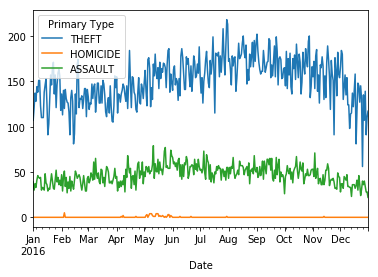

In [43]:
crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']]['2016'].resample('D').sum().plot()

## Create an interactive widget

Just a taste – see [the docs](https://ipywidgets.readthedocs.io/en/latest/index.html) for more options.

In [44]:
from ipywidgets import interact

In [45]:
@interact(crime_type = crimes_by_type.columns)
def plot_chart(crime_type='THEFT'):
    crimes_by_type.loc[:, crime_type]['2016'].resample('D').sum().plot(title=crime_type)

interactive(children=(Dropdown(description='crime_type', index=32, options=('ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'), value='THEFT'), Output()), _dom_classes=('widget-interact',))